# OPERATION SUR UN ARBRE BINAIRE DE RECHERCHE

## 1- Visualiser un arbre binaire

In [1]:
import networkx as nx
import matplotlib.pyplot as plt


#####################################################################
#               COMMANDE POUR  DESSINER UN ARBRE                    #
#####################################################################

'''
 Il suffit de définir votre arbre par exemple : arbre=[5,[4,[],[]],[5,[],[]]
puis de taper view_tree(arbre)
'''

i=-1
def view_tree(arbre):
    global i
    class ArbreBinaire:
        def __init__(self, valeur,enfant_gauche,enfant_droit):
            #Attributs : valeur (en paramètre), gauche et droit( initialisés vides)
            self.valeur = valeur
            self.enfant_gauche = enfant_gauche
            self.enfant_droit = enfant_droit



    def construire_tree(mon_arbre):
            if mon_arbre!=[]:
                return ArbreBinaire(mon_arbre[0],construire_tree(mon_arbre[1]),construire_tree(mon_arbre[2]))
            
    def hauteur(arbre):
            if arbre is None:
                return 0
            else:
                return 1 + max(hauteur(arbre.enfant_gauche), hauteur(arbre.enfant_droit))
    
    def parkour(arbre, noeuds, branches, position, profondeur, pos_courante):
            if arbre is not None:
                noeuds.append(arbre.valeur)            # on complète la liste des noeuds
                position[arbre.valeur] = (pos_courante,profondeur)     # ... et la liste des positions
                profondeur -= 1
                if arbre.enfant_gauche is not None:
                    branches.append((arbre.valeur, arbre.enfant_gauche.valeur))  #... et la liste des branches
                    parkour(arbre.enfant_gauche, noeuds, branches, position, profondeur,
                            pos_courante - 2**(profondeur - 1))
                if arbre.enfant_droit is not None:
                    branches.append((arbre.valeur, arbre.enfant_droit.valeur))
                    parkour(arbre.enfant_droit, noeuds, branches, position, profondeur,
                            pos_courante + 2**(profondeur - 1))
            return noeuds, branches, position
        
        
    def bricolage1(arbre_terrier):
        if len(arbre_terrier)==0:
            return []
        else:
            return [arbre_terrier[0]] +  bricolage1(arbre_terrier[1]) + bricolage1(arbre_terrier[2])

    def bricolage2(arbre_terrier):
        dico={}
        k=0
        for elt in bricolage1(arbre_terrier):
            dico[k]=elt
            k=k+1
        return dico
  
    def bricolage3(arbre_terrier):
        global i
        if arbre_terrier==[]:
            return []
        else:
            i=i+1
            return [i,bricolage3(arbre_terrier[1]),bricolage3(arbre_terrier[2])]

    def repr_graph(arbre):
            plt.figure()
            noeuds = []             #liste des noeuds, racines et feuilles de l'arbre
            branches =[]            # liste des branches de l'arbre
            profond = hauteur(arbre)        #hauteur de l'arbre
            pos_courante = 2**(profond - 1)   # position de la racine (en abscisse)
            position = {}                # dictionnaire des positions des noeuds sur la figure

            # appel d'une fonction récursive de parcours, ici prefixe mais ça n'a pas d'importance
            # on récupère : la liste des noeuds, la liste des branches,
            # le dictionnaire des positions des noeuds
            noeuds, branche, position  = parkour(arbre, noeuds, branches, position, profond, pos_courante)
            #print(noeuds)
            #print("branche",branche)
            #print("position", position)
            mon_arbre = nx.Graph()          # objet Graphe de la bibliothèque Networkxx
            

            
            
            mon_arbre.add_nodes_from(noeuds)
            mon_arbre.add_edges_from(branches)
            #print(list(arbre.nodes))
            #print(list(arbre.edges))
            options = {
                "font_size": 12,
                "node_size": 300,
                "node_color": "white",
                "edge_color" : "black",
                "edgecolors": "blue",
                "linewidths": 1,
                "width": 2,
            }
            nx.draw_networkx(mon_arbre, pos = position, **options,labels=dico, with_labels = True)
            ax = plt.gca()
            ax.margins(0.20)
            plt.axis("off")
            plt.show()
            #plt.close(fig)
            #return mon_arbre     #on renvoie l'objet graphe networkxx au cas où
    
    dico=bricolage2(arbre)
    arbre=bricolage3(arbre)
    repr_graph(construire_tree(arbre))
    i=-1

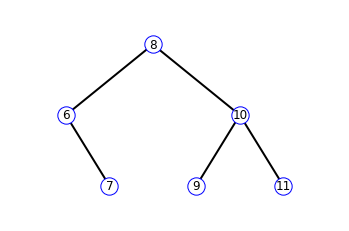

In [2]:
arbre=[8,[6,[],[7,[],[]]],[10,[9,[],[]],[11,[],[]]]]
view_tree(arbre)

## 2- Quelques prédicat

In [ ]:
def est_vide(arbre) :
    """
    prédicat retournant True si l'arbre passé en paramètre est vide
    False sinon
    return : boolean
    """
    return len(arbre)==0 #ou arbre==[]

def etiquette(noeud):
    return noeud[0]

def fils_gauche(noeud):
    return noeud[1]

def fils_droit(noeud):
    return noeud[2]

## Recherche

In [ ]:
def recherche(v,A):
    '''
    param : A est un arbre (ABR) et v une valeur (ou clef)
    return : boolean True si v est présent dans A False sinon
    '''
    # http://bfourlegnie.com/Tnsi_2020/cours/Chap_arbre/Arbres%20Binaires%20de%20Recherche.pdf


Avec le code ci-dessous, vérifier le bon fonctionnment de votre algorithme.

In [ ]:
arbre=[8,[6,[],[7,[],[]]],[10,[9,[],[]],[11,[],[]]]]
view_tree(arbre)
print(recherche(9,arbre))
print(recherche(4,arbre))

## Insersion

In [ ]:
def inserer(v,A):
    '''
    param : A est un arbre (ABR) et v une valeur (ou clef)
    return : un ABR -> l'arbre A dans lequel on a inséré v
    '''
    # http://bfourlegnie.com/Tnsi_2020/cours/Chap_arbre/Arbres%20Binaires%20de%20Recherche.pdf

    1-  A partir d'un arbre vide, construire un arbre binaire de recherche en insérant successivement les valeurs suivantes : 7, 3, 4, 10, 2, 6, 14, 5

In [ ]:
arbre=[]
for elt in [7,3,4,10,2,6,14,5]:
    pass
view_tree(arbre)

    2- A partir d'un arbre vide, construire un arbre binaire de recherche en insérant successivement 15 entiers choisis aléatoirement entre 0 et 50

In [ ]:
import random
L=[i for i in range(51)]
random.shuffle(L)
pass



view_tree(arbre)